Lets first import all the dependencies. `PIL` is the standard python image library. `numpy` for numerical computations, `matplotlib` for plotting charts and `itertools` for producing permutations 

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import itertools

now well open the images, convert them to grayscale and then convert them to numpy arrays.

In [2]:
file_path = '/home/mohammad_14aug/ComputerVisionExercises/Exercise1'
img1 = Image.open(file_path + '/sample1.jpg').convert('L')
img2 = Image.open(file_path + '/sample2.jpg').convert('L')
img1 = np.asarray(img1).swapaxes(0, 1)
img2 = np.asarray(img2).swapaxes(0, 1)
print(type(img1))
print(np.shape(img1))

<class 'numpy.ndarray'>
(2560, 1440)


well use `matplotlib` to visualize our images and charts. lets take a look at our sample images.

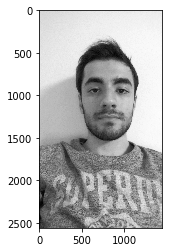

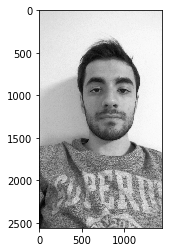

In [3]:
plt.imshow(img1, cmap = 'gray')
plt.show()
plt.imshow(img2, cmap = 'gray')
plt.show()

The images seem to be quite similar. Lets compare the pixels value by value to see how similar our images *really* are

# Exercise 1
**take two pictures from one scene and compare them pixel by pixel. are they exactly the same?**

In [4]:
dissimilar_pixels = 0
height, width = np.shape(img1)
for h in range(height):
    for w in range(width):
        if img1[h, w] != img2[h, w]:
            dissimilar_pixels += 1
print("ratio of dissimilar pixels to whole is: " + str(dissimilar_pixels / (height * width)))

ratio of dissimilar pixels to whole is: 0.92341796875


quite interesting isn't is! only $\%8$ of the pixels are exactly the same. even though the images look similar theyre actually very different! <br> lets visualize the difference between these two images to get a better understanding

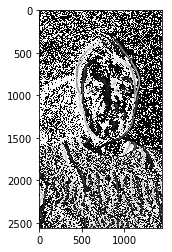

In [5]:
diff_image = np.subtract(img1, img2)
plt.imshow(diff_image, cmap = 'gray')
plt.show()

# Exercise 2
on the second exercise well produce all the possible images for a given histogram. 
the pixel values are: $ [0, 0, 1, 1, 1, 2] $ and the image dimensions are $2 \times 3 $.<br>
the `permutations` function from the `itertools` library will give us all the permutations of this array.
but some permutations will be repetitive, so lets add them all to a `Set` to get unique values.

In [6]:
histogram_values = [0, 0, 1, 1, 1, 2]
unique_values = {}
histogram_permutations = list(itertools.permutations(histogram_values))
for permutation in histogram_permutations:
    if unique_values.get(permutation) == None:
        unique_values[permutation] = 1
unique_permutations = list(unique_values.keys())
print("total number of unique permutations is: " + str(len(unique_permutations)))

total number of unique permutations is: 60


now lets simply plot all of the permutations! There should be a total 60 because: $\frac{6!}{2!3!} = 60$
*(there are six values. that give us a total of $6!$ permutations, the ones can be displaced in $3!$ different ways and the zeros in $2!$ ways. therefore we have the formula above)*

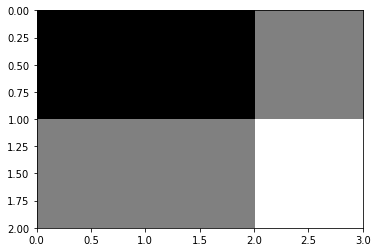

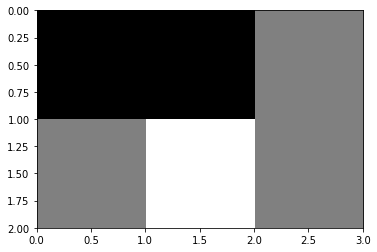

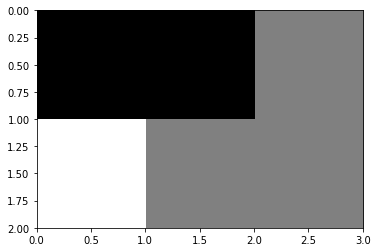

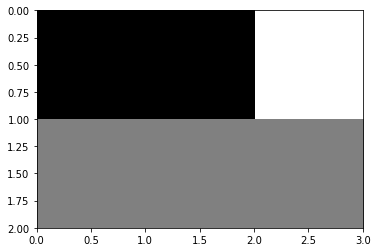

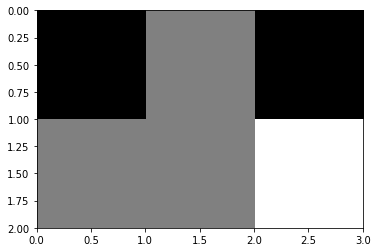

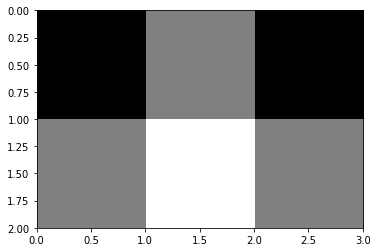

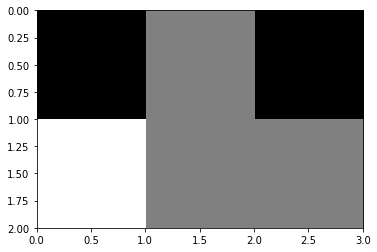

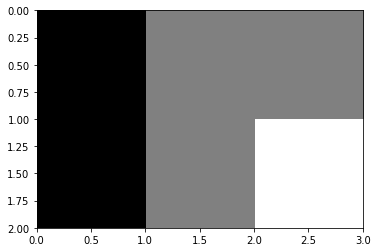

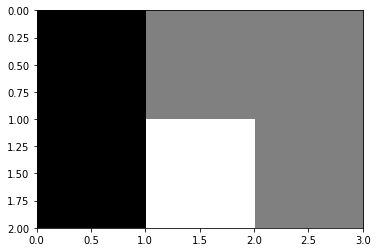

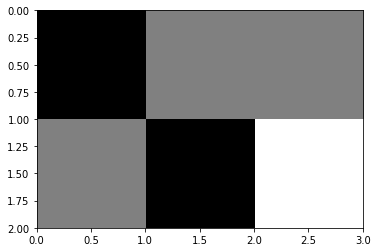

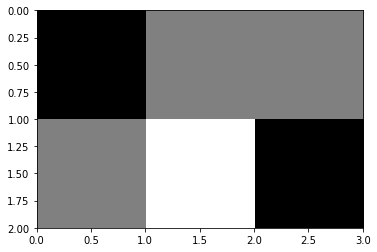

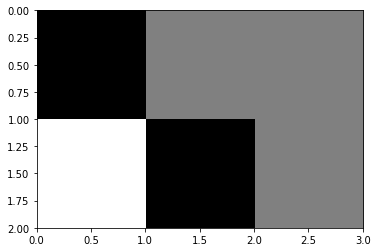

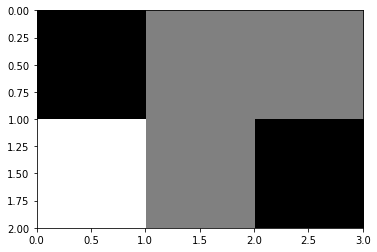

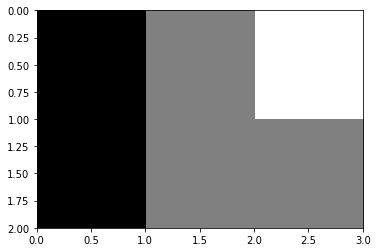

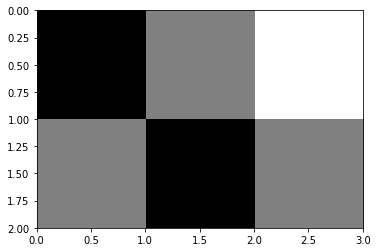

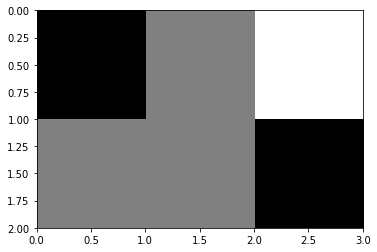

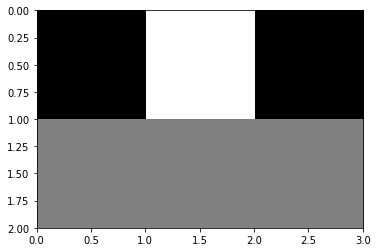

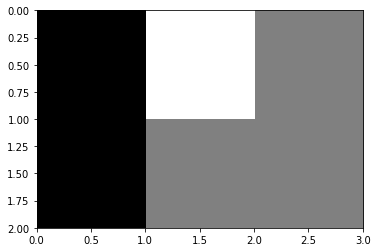

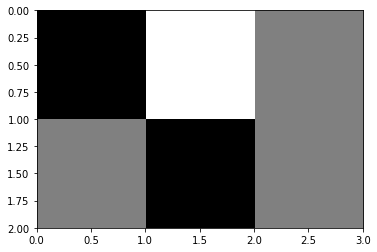

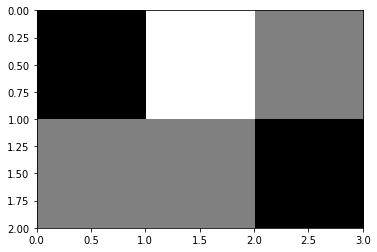

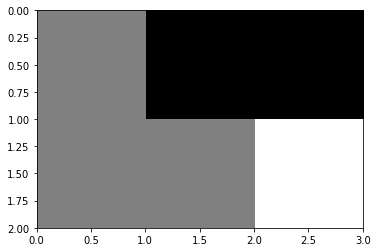

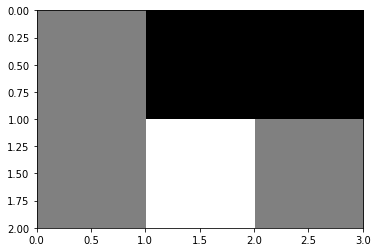

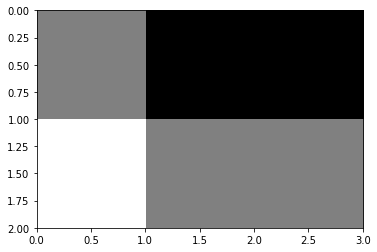

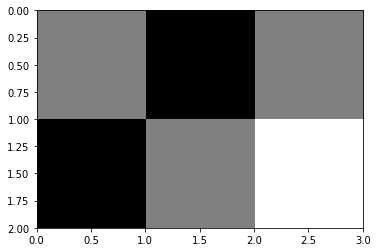

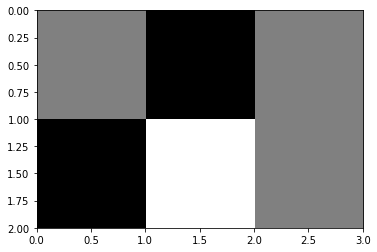

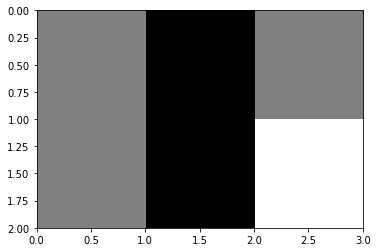

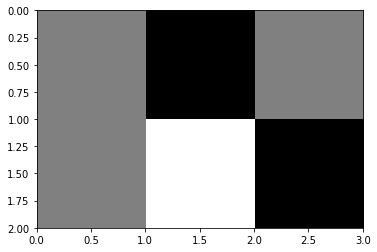

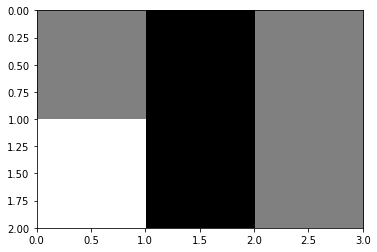

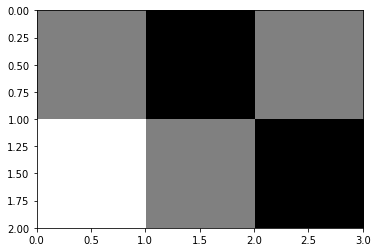

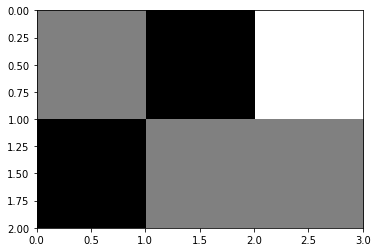

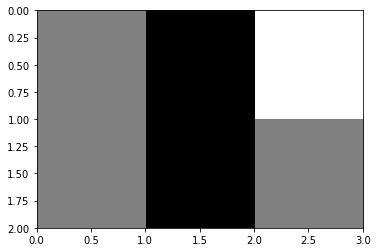

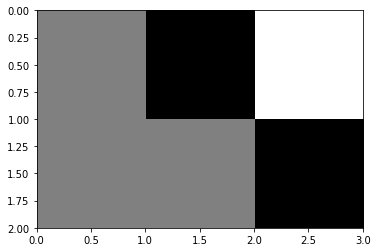

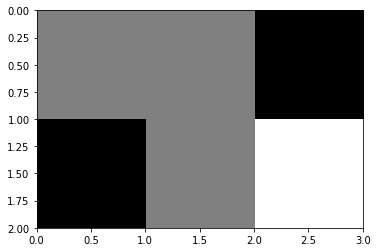

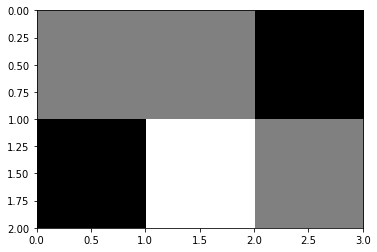

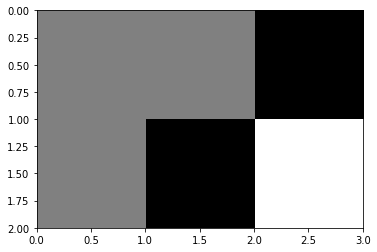

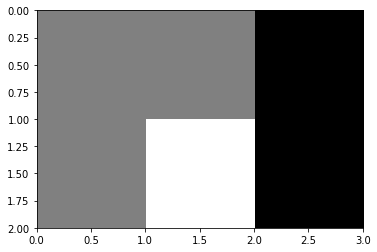

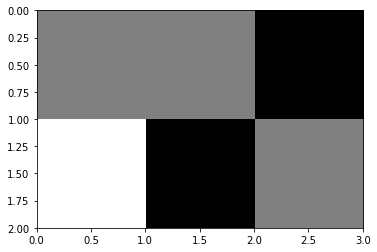

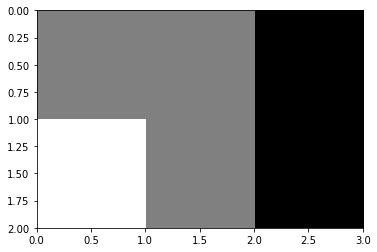

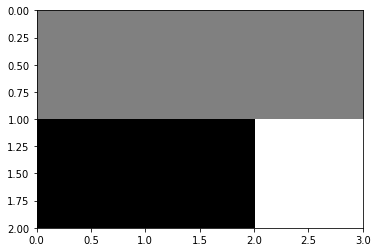

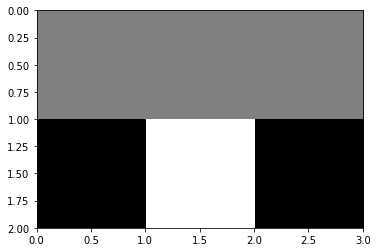

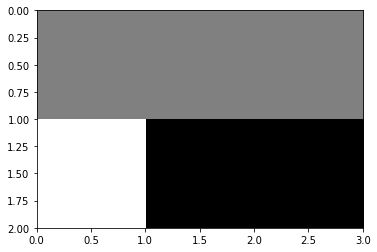

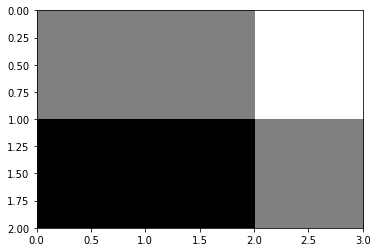

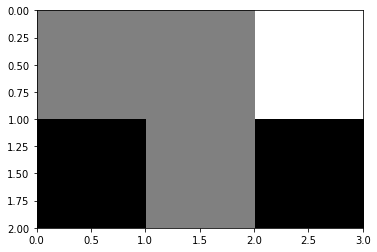

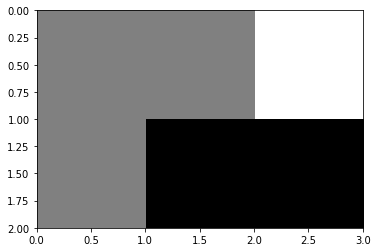

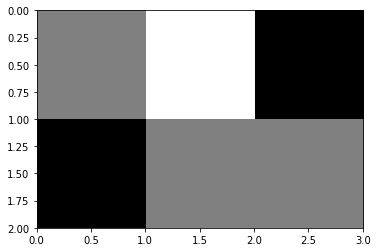

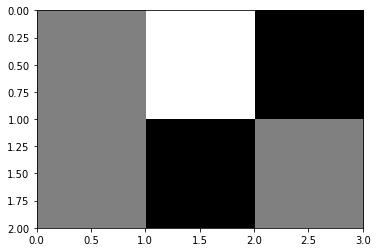

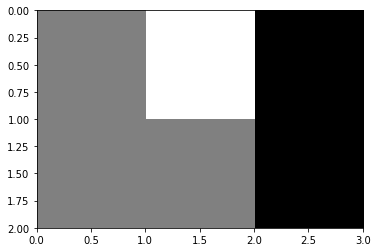

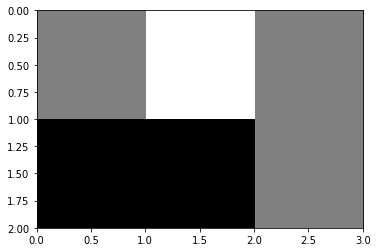

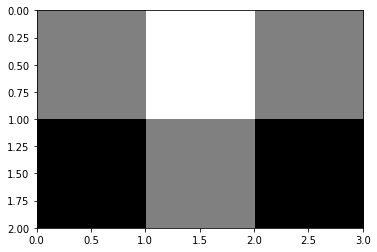

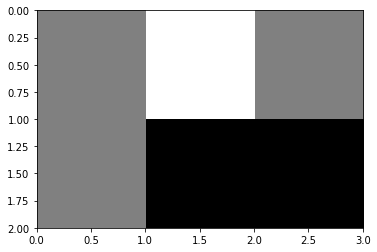

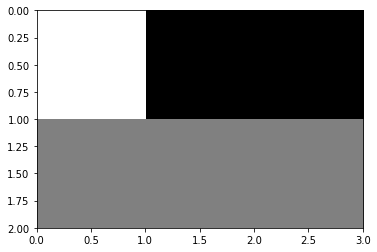

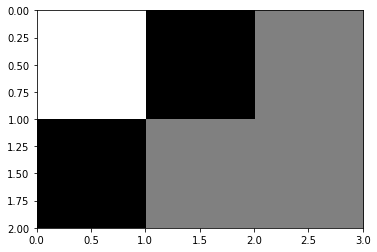

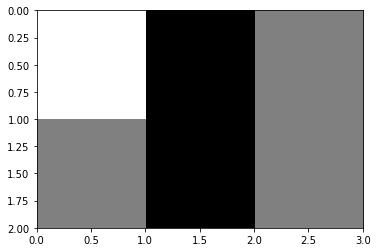

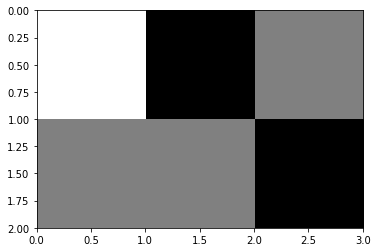

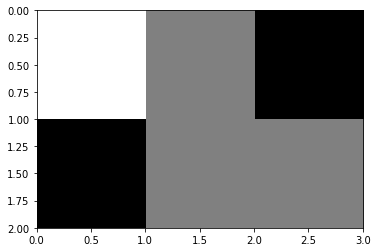

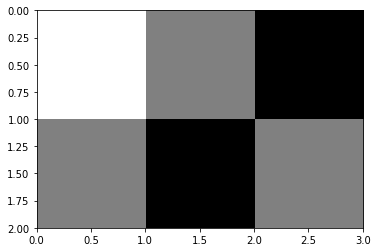

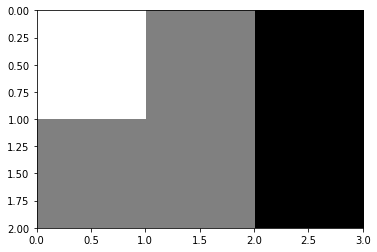

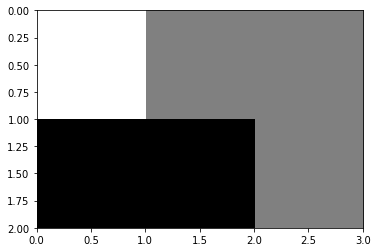

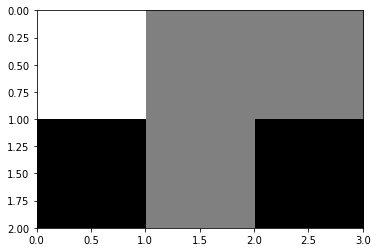

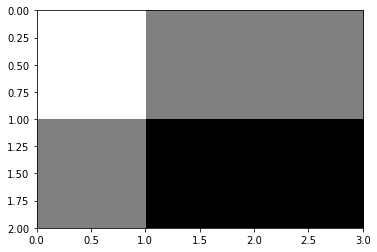

In [7]:
for permutation in unique_permutations:
    plt.imshow(np.reshape(permutation, [2, 3]) , cmap='gray', interpolation=None, extent=[0, 3, 2, 0])
    plt.show()

# Exercise 3
** plot the histogram of a grayscale image ** <br>
now lets take an image and plot the histogram. the algorithm is quite simple so i wont give much explanation

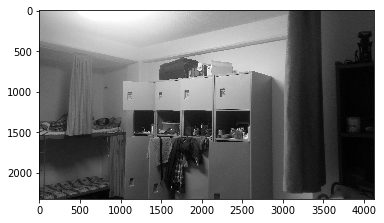

In [8]:
histogram = [0] * 256
img3 = np.asarray(Image.open(file_path + '/sample3.jpg').convert('L'))
plt.imshow(img3, cmap = 'gray')
height, width = np.shape(img3)
for h in range(height):
    for w in range(width):
        histogram[img3[h][w]] += (1 / (height * width))        

a chart can be plotted using the `plot` function from the `matplotlib.pyplot` library. the matplotlib library is actually an implementation of matlabs plotting functions in python.

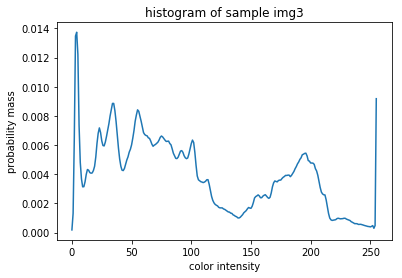

In [9]:
plt.plot(range(256), histogram)
plt.xlabel("color intensity")
plt.ylabel("probability mass")
plt.title("histogram of sample img3")
plt.show()
histogram_cdf = histogram

### Not part of exericse
I plotted the CDF(cumulative distribution function) of the histogram just out of curiousity :)

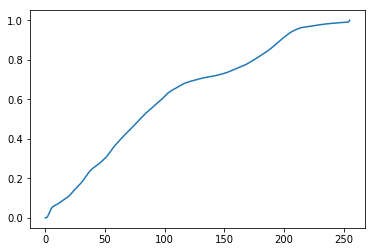

In [10]:
for i in range(1 , 256):
    histogram_cdf[i] += histogram_cdf[i - 1]
plt.plot(range(256), histogram_cdf)
plt.show()

And here i wrote two functions that compute and plot the histogram of any grayscale image respectively. lets try it on our first samples

In [11]:
def histogram(img1):
    histogram = [0] * 256
    height, width = np.shape(img1)
    for h in range(height):
        for w in range(width):
            histogram[img1[h][w]] += (1 / (height * width))
    return histogram

def plot_histogram(histogram):
    plt.title("histogram of the image")
    plt.xlabel("color intensity")
    plt.ylabel("probability mass")
    plt.plot(range(256), histogram)
    plt.show()

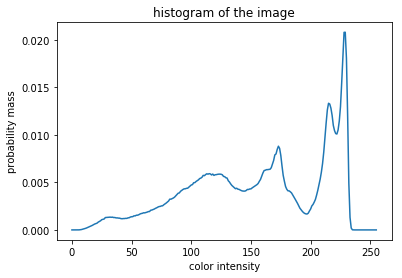

In [12]:
hist = histogram(img1)
plot_histogram(hist)

# Exercise 4
** figure out a useful algorith that converts any grayscale image to a 256*256 matrix** <br>
Now lets find a way to convert a sample image to a 256x256 matrix.
our pixels intensities are of type `uint8` which makes them vary between 0 and 255. lets create a matrix $M$ where $M_{i j}$ is the number of transitions from color i to color j


In [13]:
def img_to_256x256(img):
    M = np.zeros([256, 256], dtype=int)
    height, width = np.shape(img)
    for h in range(1, height - 1):
        for w in range(1,width - 1):
            intensity1 = img[h, w]
            for i in range(-1, 1):
                for j in range(-1, 1):
                    if i != j:
                        M[intensity1][img[h + i][w + j]] += 1
    return M
            

In [14]:
M = img_to_256x256(img1)
print(M[1:14, 1:14])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   3   0   1   0   0   1   0]
 [  0   0   0   0   1   1   6   9   4   4   3   2   0]
 [  0   0   0   0   0  10  26  38  22   9   5   3   1]
 [  0   0   0   1   1   8  37  73  55  61  26  12   2]
 [  0   0   0   0   0   5  18  70 137 126 104  41  20]
 [  0   0   0   0   0   2  13  46 127 190 201 114  78]
 [  0   0   0   0   1   1   7  22  90 154 212 217 172]
 [  0   0   0   0   0   0   2  13  60 142 224 299 252]
 [  0   0   0   1   1   0   2   4  24  70 155 278 351]]


after taking a peek at the matrix, it seems that most of our transitions are on the matrix diameter where the colors are close to each other. this means that there are not much sharp edges in our image, but lets plot this matrix to take a better grasp.

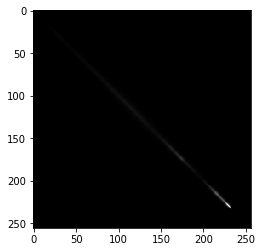

In [15]:
plt.imshow(M, cmap = 'gray')
plt.show()

nearly all transitions are on the diagonal matrix. this means that our image contains very little sharp transitions. and the line is very thicker on the end which means that most of the image colors are on the brighter side, so this image probably has too much lighting